In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd

In [2]:
dir_image = '/home/hhg/Research/galaxyClassify/catalog/galaxyZoo_kaggle/gz2_images/images'
dir_cat = "/home/hhg/Research/galaxyClassify/catalog/galaxyZoo/zoo2/"
df_all = pd.read_csv(dir_cat+'gz2_all_v2.csv')

In [3]:
df_all.groupby(['label_8']).size()

label_8
0    33898
1    39200
2     7414
3    16349
4    20407
5    30657
6     5925
7     2101
dtype: int64

In [4]:
def draw_galaxyID(class_label, n=1):
    
    df = df_all[df_all.label_8==class_label].copy()
    
    if n==1:
        return df.sample(n=n, axis='rows').galaxyID.values[0]
    else:
        return df.sample(n=n, axis='rows').galaxyID.values

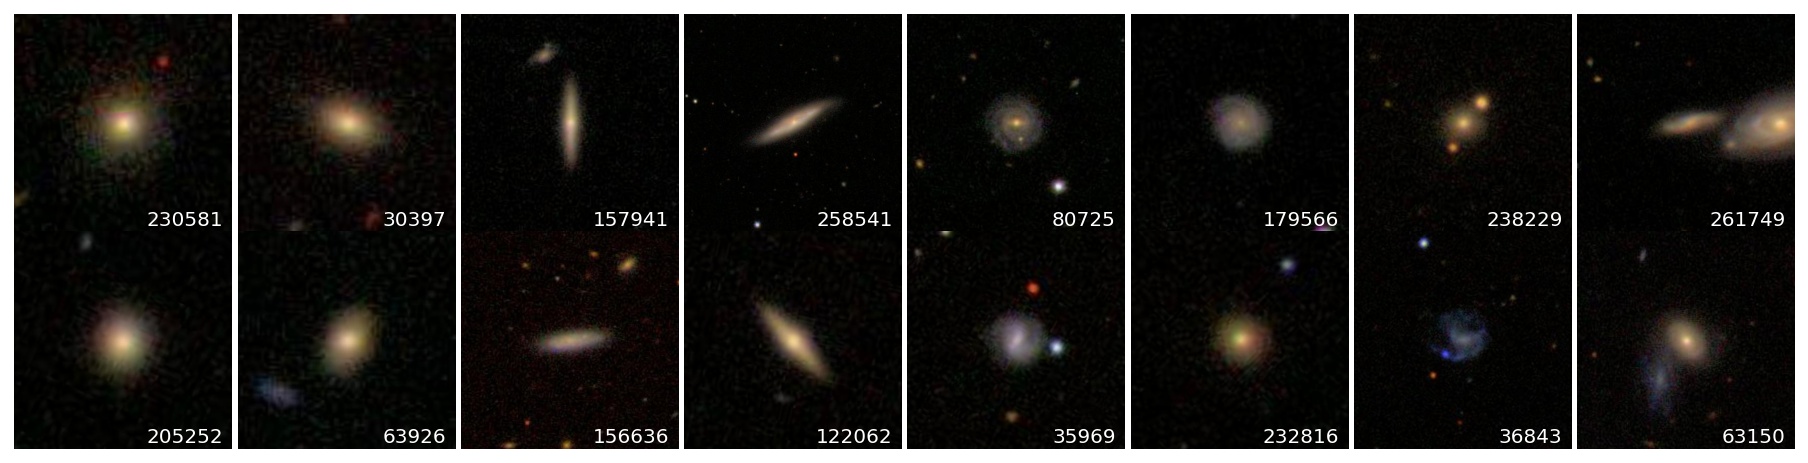

In [5]:
gal_example = {}
for classID in range(8):
    gal_example[classID] = draw_galaxyID(classID, n=3)

fig, axes = plt.subplots(2, 8, figsize=(16, 4))
plt.subplots_adjust(hspace=0.001, wspace=0.001)

for classID in range(8):
    for i in range(2):
        galID = gal_example[classID][i]
        #galID = gal_good[classID][i]
        IMG = plt.imread(dir_image+f'/{galID}.jpg')
        axes[i][classID].imshow(IMG)
        
        axes[i][classID].text(0.96, 0.01, f'{galID}',
        verticalalignment='bottom', horizontalalignment='right',
        transform=axes[i][classID].transAxes,
        color='white')

for i, ax in enumerate(axes.flat):
    ax.axis('off')

In [6]:
gal_good = {
    0 : [243021, 111880],
    1 : [30598, 101116, 153180, 20907], 
    2 : [289775, 134298, 122154],
    3 : [40827, 229057],
    4 : [277467, 82168],
    5 : [117240, 269912, 63748],
    6 : [141914, 259134, 271664],
    7 : [270497, 221654, 247077],
}

In [7]:
class_type = {
    0 : 'Round Elliptical', 
    1 : 'In-between',
    2 : 'Cigar-shaped',
    3 : 'Edge-on',
    4 : 'Barred Spiral',
    5 : 'Unbarred Spiral',
    6 : 'Irregular',
    7 : 'Merger',
}

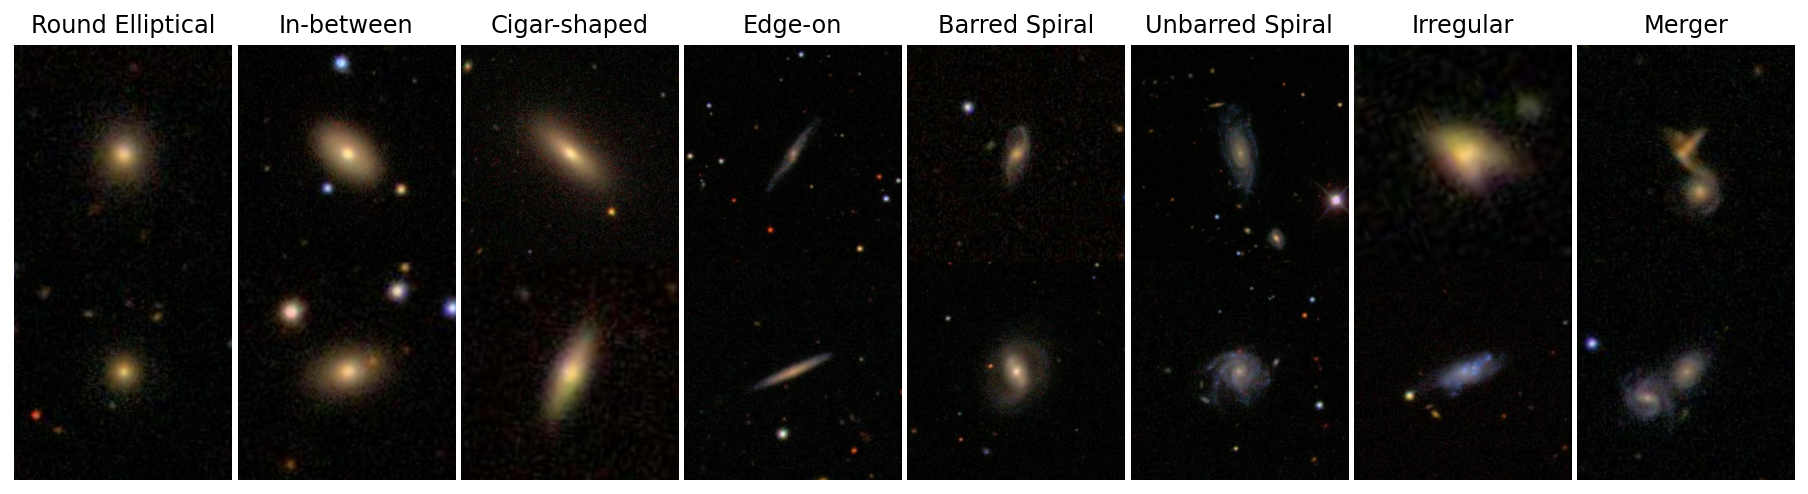

In [8]:
fig, axes = plt.subplots(2, 8, figsize=(16, 4))
plt.subplots_adjust(hspace=0.001, wspace=0.001)

for classID in range(8):
    axes[0][classID].set_title(class_type[classID])
    for i in range(2):
        #galID = gal_example[classID][i]
        galID = gal_good[classID][i]
        IMG = plt.imread(dir_image+f'/{galID}.jpg')
        axes[i][classID].imshow(IMG)

for i, ax in enumerate(axes.flat):
    ax.axis('off')
    
#plt.tight_layout()
fig.savefig('galaxy_types2.pdf')